<h2><center><font color='black'>   Taking a Deep-Learning Dive with Keras </font></center></h2>

<img src='imgs/Deep_Dive_Keras_3.jpg'/>

## Recurrent Neural Nets


- enables us to work with sequence-like data
- enables us to leverage inputs of variable length



###  Snippet of a fully connected model
<img src='imgs/full_connect.png'/>

### Snippet of RNN
<img src='imgs/rnn3.jpg'/>

#### Our recurrence formula:
$$s_t=f_W(s_{t-1},x_t)$$



#### Pseudo-code example:  RNN for text 'generation' 

In [ ]:

Vocab_size =1000 
hidden_layer=100

# U ~ 100x 1000  - Input Weight matrix
# V ~ 1000 x 100 - Output Weight matrix
# W ~ 100 x 100  - Hidden State Weight matrix

time_steps = 10   #  where time_steps are # of words in sample

# define our state matrix:
# s = 10 X 100

# output
# o = 1 x 1000

for t in time_steps:
    #  np.dot(U,[x[t]]   ~ essentially a look-up for U
    s[t]=np.tanh(np.dot(U,[x[t]]) + np.dot(W,s[t-1])  # squash output to between -1,1
                
o[t] = softmax(V.dot(s[t])) # at t= 9
                 
## during backprop, we continue to update each matrix: U,V,W

### RNN: Process Sequences

<img src='imgs/rnn_one.png'/>

## RNN Example: Text Classification
- Let's try an RNN for the same Reuters classification task:

In [5]:
import numpy as np
import sys
np.random.seed(13)
from keras.models import Sequential
from keras.layers import Dense, Embedding, Reshape, Activation, SimpleRNN, GRU, LSTM, Convolution1D, MaxPooling1D, Merge, Dropout
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils.np_utils import to_categorical
from IPython.display import SVG

from keras.datasets import imdb, reuters
from keras.preprocessing import sequence
from keras.utils.vis_utils import model_to_dot, plot_model

import keras

#### Ex 1: Reuters newswire data via ANN
- reuter newswire ~ loads the Reuters newswire classification dataset
- 46 classes

In [2]:
max_features = 2000
(X_train, y_train), (X_test, y_test) = reuters.load_data(
    num_words=max_features)
maxlen = 10
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
nb_epoch = 20

In [28]:
# let's see how our data is returned
print(X_test[0])
print(y_test[0])
np.unique(y_test)

[324  27  56   2   2   5 192 510  17  12]
3


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [33]:
# Develop ANN Model

model = Sequential()

model.add(Dense(64, input_dim=10, kernel_initializer='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, kernel_initializer='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(46, kernel_initializer='uniform'))
model.add(Activation('softmax'))

# Momentum: gradient descent moves faster if gradient keeps pointing in the same direction
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

cb=keras.callbacks.RemoteMonitor(root='http://localhost:9000')
model.fit(X_train, y_train,
          epochs=20, callbacks=[cb],
          batch_size=32,validation_data=[X_test, y_test])


Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 0s - loss: 3.1011 - acc: 0.2611 - val_loss: 2.7102 - val_acc: 0.2110
Epoch 2/20
8982/8982 [==============================] - 0s - loss: 3.3135 - acc: 0.2477 - val_loss: 3.1247 - val_acc: 0.0441
Epoch 3/20
8982/8982 [==============================] - 0s - loss: 3.3714 - acc: 0.2534 - val_loss: 2.8647 - val_acc: 0.1638
Epoch 4/20
8982/8982 [==============================] - 0s - loss: 3.3333 - acc: 0.2554 - val_loss: 2.9718 - val_acc: 0.2110
Epoch 5/20
8982/8982 [==============================] - 0s - loss: 3.3508 - acc: 0.2532 - val_loss: 2.9016 - val_acc: 0.3620
Epoch 6/20
8982/8982 [==============================] - 0s - loss: 3.3698 - acc: 0.2462 - val_loss: 2.7145 - val_acc: 0.3620
Epoch 7/20
8982/8982 [==============================] - 0s - loss: 3.3725 - acc: 0.2532 - val_loss: 2.6893 - val_acc: 0.2159
Epoch 8/20
8982/8982 [==============================] - 0s - loss: 3.3689 - a

#### Review score & loss results.  Thoughts ? 

#### Ex 2: Reuters newswire data via RNN

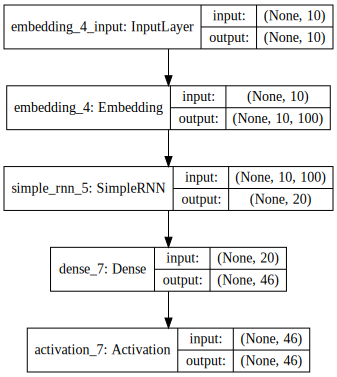

In [20]:
# Create the model
model = Sequential()

# This is the most basic kind of RNN!  We're using 20 units, 
# which somewhat reflects our "memory" of past events in a sequence
model.add(Embedding(input_dim=max_features, output_dim=100, embeddings_initializer="glorot_uniform", input_length=maxlen))
# This is the most basic kind of RNN!  We're using 20 units, 
model.add(SimpleRNN(20, return_sequences=False))
model.add(Dense(46))  # number of classes
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

###  Wait a sec, what is an Embedding layer?
[word embeddings](http://i2.wp.com/www.lifestyletrading101.com/wp-content/uploads/2017/03/word2-vec-king-queen-math.png)      
[word2vec](https://i.stack.imgur.com/6eVXZ.jpg)

In [15]:
# refresh localhost: 9000
cb=keras.callbacks.RemoteMonitor(root='http://localhost:9000')

model.fit(X_train,y_train,epochs=20,
         validation_data=(X_test,y_test),callbacks=[cb])

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 2s - loss: 1.5753 - acc: 0.5950 - val_loss: 2.1755 - val_acc: 0.4448
Epoch 2/20
8982/8982 [==============================] - 2s - loss: 1.5533 - acc: 0.6006 - val_loss: 2.1883 - val_acc: 0.4466
Epoch 3/20
8982/8982 [==============================] - 2s - loss: 1.5340 - acc: 0.6074 - val_loss: 2.2049 - val_acc: 0.4448
Epoch 4/20
8982/8982 [==============================] - 1s - loss: 1.5109 - acc: 0.6145 - val_loss: 2.2210 - val_acc: 0.4457
Epoch 5/20
8982/8982 [==============================] - ETA: 0s - loss: 1.4878 - acc: 0.624 - 1s - loss: 1.4913 - acc: 0.6226 - val_loss: 2.2382 - val_acc: 0.4452
Epoch 6/20
8982/8982 [==============================] - 1s - loss: 1.4703 - acc: 0.6318 - val_loss: 2.2546 - val_acc: 0.4448
Epoch 7/20
8982/8982 [==============================] - 1s - loss: 1.4498 - acc: 0.6383 - val_loss: 2.2795 - val_acc: 0.4421
Epoch 8/20
8982/8982 [=================

####  What do you notice about the training results ?

Let's improve ! 



### LSTM  - Long Short Term Memory

<img src='imgs/lstm_3_anno.png'/>
<img src='imgs/lstm_eqn.png'/>

[credits: Colah's Blog](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)

#### Ex 3: Last time with Reuters newswire via LSTM

### Code Along!

1) Run the following LSTM model.     
- We see a moderate improvement from our RNN model.  How can we improve this further? 

Hints: 
* Adjust # of memory units
* Compare & contrast different optimizers
* Shit-tab to read LSTM & Embedding DocStrings.  Experiment with other arguments!

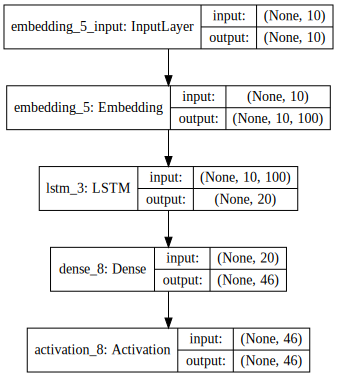

In [21]:
# Create the model
model = Sequential()

model.add(Embedding(input_dim=max_features, output_dim=100, embeddings_initializer="glorot_uniform", input_length=maxlen))

model.add(LSTM(20, return_sequences=False)) # again 20 'memory' units
model.add(Dense(46))  # number of classes
model.add(Activation('softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [19]:
# refresh localhost: 9000
cb=keras.callbacks.RemoteMonitor(root='http://localhost:9000')

model.fit(X_train,y_train,epochs=20,
         validation_data=(X_test,y_test),callbacks=[cb])

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 3s - loss: 2.6219 - acc: 0.3484 - val_loss: 2.1871 - val_acc: 0.4127
Epoch 2/20
8982/8982 [==============================] - 3s - loss: 2.1069 - acc: 0.4417 - val_loss: 2.0609 - val_acc: 0.4622
Epoch 3/20
8982/8982 [==============================] - 3s - loss: 2.0167 - acc: 0.4601 - val_loss: 2.0286 - val_acc: 0.4577
Epoch 4/20
8982/8982 [==============================] - 3s - loss: 1.9621 - acc: 0.4704 - val_loss: 2.0080 - val_acc: 0.4724
Epoch 5/20
8982/8982 [==============================] - 3s - loss: 1.9174 - acc: 0.4823 - val_loss: 1.9837 - val_acc: 0.4751
Epoch 6/20
8982/8982 [==============================] - 3s - loss: 1.8853 - acc: 0.4947 - val_loss: 1.9623 - val_acc: 0.4840
Epoch 7/20
8982/8982 [==============================] - 3s - loss: 1.8582 - acc: 0.5020 - val_loss: 1.9505 - val_acc: 0.4844
Epoch 8/20
8982/8982 [==============================] - 3s - loss: 1.8375 - a

## Text Generation with LSTM & shakespeare

In [9]:
file='data/alllines.txt'  # read in shakespeare from our local file
text = open(file).read().lower()
print('corpus length:', len(text))
print ('\n')
print (text[:108])

# let's just take the first 500K
text=text[:500000]

chars = sorted(list(set(text)))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

print('Vectorization...')
X = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1


# build the model: a single LSTM
print('Build model...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)


def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

# train the model, output generated text after each iteration
losses=[]
for iteration in range(1, 10):
    print()
    print('-' * 50)
    print('Iteration', iteration)
    model.fit(X, y, batch_size=128, epochs=1)

    start_index = np.random.randint(0, len(text) - maxlen - 1)

    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print()
        print('----- diversity:', diversity)

        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x[0, t, char_indices[char]] = 1.

            preds = model.predict(x, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

corpus length: 4583798


"act i"
"scene i. london. the palace."
"enter king henry, lord john of lancaster, the earl of westmoreland, 
total chars: 44
nb sequences: 166654
Vectorization...
Build model...

--------------------------------------------------
Iteration 1
Epoch 1/1
166654/166654 [==============================] - 420s - loss: 1.9685   

----- diversity: 0.2
----- Generating with seed: "race to his majesty's parliament,"
"hold"
race to his majesty's parliament,"
"hold the for the dies, the for the warding them bears,"
"and the for i the beat he beath the compand"
"and the live the beat the will the fortur the will son and the england,"
"thy warming the for the beat the son,"
"i will the for with the will the fortur bears,"
"and come the deed the deat the comment them son the sence"
"and the for the lord, the so my lord,"
"the for with the beater with the fortu

----- diversity: 0.5
----- Generating with seed: "race to his majesty's parliament,"
"hold"
race to his majesty's pa

"a shorter time shall send me to you,"
"and the somerset it with the field of the realm,"
"and he shall be the tread of the bear,"
"and the repost the bear the bear the freet:"
"and then thou art the country where then then the curse,"
"and then the court of the reprouse and sons."
"i'll be the tread of the life and wounds,"
"but the reprove me me with the field the realm,"
"and the freet the field the traing the father,"
"the freet 

----- diversity: 0.5
----- Generating with seed: "."
"a shorter time shall send me to you,"
."
"a shorter time shall send me to you,"
"i be reseen the king drees! well, country the realm,"
"the never your death the never the field."
"and present and the upon the soldiers,"
"and the king his duke his lord of suffolk,"
"and i sir please and the beak the crown"
"and by the prouder of our brother margrace,"
"the truth the freet his protector,"
"with persed with an ary a stronger"
"and would i steen, i concestore the father,"
"the 

----- diversity: 1.0
----- 

##  Additional Challenges & Work Alongs: 

1) On your GPU, repeat the Reuters Newswire Problem : leverages a LSTM together with A CNN!       
2) Develop another text generation model using alternate data sources: 
    (data ref options)
     - https://s3.amazonaws.com/text-datasets/nietzsche.txt
     - [create lyrics from your favorite artist](https://www.kaggle.com/mousehead/songlyrics/data)
     - any other dataset of your choice! 
     
     
    
    
    



    